# 1. Repetindo o que fiz no primeiro EP do kNN: Data analysis

In [1]:
# data
import numpy as np
import pandas as pd
# plots
from matplotlib import pyplot as plt
from matplotlib import colors
# supress scipy.stats.mode warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# function to plot histograms
def hist(x, title='', xlabel='', ylabel='', pct=False,
         cmap='viridis', fontsize=14, annotate=False,
         func=lambda x: x*x, df=False, show=True,
         subplot=False, ax=None):
    if not subplot:
        fig, ax = plt.subplots()
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize+2)
    sumx = 1
    if pct:
        sumx = sum(x)
        x = x / sumx
    if not df:
        bins = x.max() - x.min()
        n, bin_array, patches = ax.hist(x, bins)
    else:
        x.plot(kind='bar', ax=ax)
        n = x.to_numpy()
        patches = ax.patches
    fracs = func(n/n.max())
    norm = colors.Normalize(0, 1)
    cm = plt.cm.get_cmap(name=cmap)
    for frac, patch in zip(fracs, patches):
        color = cm(norm(frac))
        patch.set_facecolor(color)
        if annotate == True:
            w = patch.get_width()
            h = patch.get_height()
            X, Y = patch.get_xy()
            if h < 0.15:
                height = h + 0.02
            else:
                height = 0.5 * h
            if h * sumx > 9999:
                char = '\n'
            else:
                char = ' '
            ax.annotate(f'{round(100*h,1)}%{char}({int(h * sumx)})',
                        (X + w/2, height), ha='center')
    if show:
        plt.show()

## 1.1.Data visualization

In [3]:
features=["ID", "Age", "Workclass", "fnlwgt", "Education",
    "Education Number", "Marital Status", "Occupation",
    "Relationship", "Race", "Sex", "Capital Gain",
    "Capital Loss", "Hours per week", "Country"]
a = pd.read_csv('../input/adult-pmr3508/train_data.csv', names=features + ['Income'],
    sep=',', engine='python', na_values='?',
    header=0)
t = pd.read_csv('../input/adult-pmr3508/test_data.csv', names=features,
    sep=',', engine='python', na_values='?',
    header=0)
a

,ID,Age,Workclass,fnlwgt,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,48835,42,Private,384236,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
32556,48836,23,Private,129042,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
32557,48837,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
32558,48838,18,Private,27620,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K


#### First of all, the 'Country' column is very unbalanced:

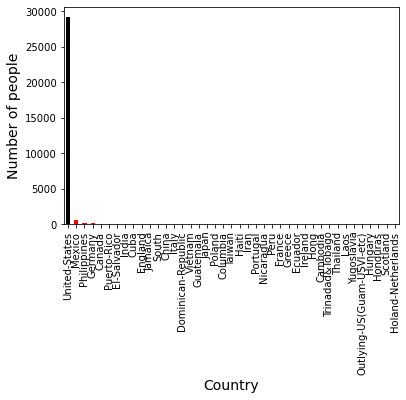

In [4]:
hist(x=a['Country'].value_counts(),
     xlabel='Country', ylabel='Number of people', df=True, cmap='flag')

#### Therefore, we subdivide 'Country' in less categories 'Continent'.

In [5]:
dict_countries = {
    # North America
    'United-States':'North America','Canada':'North America',
    # Europe
    'England':'Europe','Greece':'Europe','Germany':'Europe','Italy':'Europe','Poland':'Europe',
    'Portugal':'Europe','Ireland':'Europe','France':'Europe','Hungary':'Europe','Yugoslavia':'Europe',
    'Scotland':'Europe','Holand-Netherlands':'Europe',
    # Asia
    'Cambodia':'Asia','India':'Asia','Hong':'Asia','Japan':'Asia','China':'Asia','Philippines':'Asia',
    'Vietnam':'Asia','Laos':'Asia','Taiwan':'Asia','Thailand':'Asia','Iran':'Asia',
    # Latin America
    'Puerto-Rico':'Latin America','Outlying-US(Guam-USVI-etc)':'Latin America',
    'Cuba':'Latin America','Honduras':'Latin America','Jamaica':'Latin America',
    'Mexico':'Latin America','Dominican-Republic':'Latin America','Ecuador':'Latin America',
    'Haiti':'Latin America','Columbia':'Latin America','Guatemala':'Latin America',
    'Nicaragua':'Latin America','El-Salvador':'Latin America',
    'Trinadad&Tobago':'Latin America','Peru':'Latin America',
    # Africa
    'South':'Africa'  # South Africa
}
a.loc[a['Country'].isna(),'Country'] = 'United-States'  # United States is the most common country
a['Continent'] = [dict_countries[country] for country in a['Country']]
t.loc[t['Country'].isna(),'Country'] = 'United-States'
t['Continent'] = [dict_countries[country] for country in t['Country']]

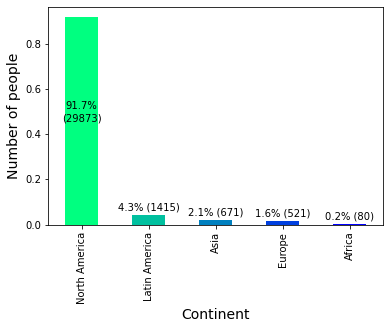

In [6]:
hist(x=a['Continent'].value_counts(), func=lambda x: np.linspace(1,0,len(x)),
     pct=True, annotate=True, xlabel='Continent', ylabel='Number of people',
     df=True, cmap='winter')

#### We can see below that 'Education' and 'Education Number' are actually the same feature.

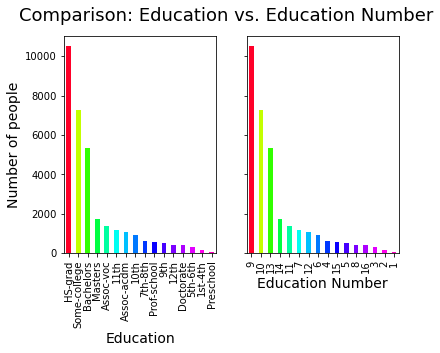

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
hist(subplot=True, ax=ax1, x=a['Education'].value_counts(), title='',
          xlabel='Education', ylabel='Number of people',
          cmap='gist_rainbow', df=True, show=False,
          func=lambda x: np.sqrt(np.linspace(0, 1, num=len(x))))
hist(subplot=True, ax=ax2, x=a['Education Number'].value_counts(), title='',
     xlabel='Education Number', ylabel='Number of people',
     cmap='gist_rainbow', df=True, show=False,
     func=lambda x: np.sqrt(np.linspace(0, 1, num=len(x))))
fig.suptitle('Comparison: Education vs. Education Number', fontsize=18)
plt.show()

#### We are going to use 'Education Number', removing the 'Education' feature.

In [8]:
a['Capital Gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1455         1
6097         1
22040        1
7978         1
4931         1
Name: Capital Gain, Length: 119, dtype: int64

In [9]:
a['Capital Loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1944        1
2201        1
2282        1
2489        1
155         1
Name: Capital Loss, Length: 92, dtype: int64

#### Since there are a lot of people that has 0 as 'Capital Loss' or 'Capital Gain', we are going to combine these two features in only one, named 'Capital Info'.

#### if 'Capital Loss' != 0 or 'Capital Gain' != 0, we say that the person has 'Capital Info' = 1.

In [10]:
def create_capital_info(data):
    capital_info = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Capital Gain'] != 0 or data.iloc[i]['Capital Loss'] != 0:
            capital_info.append('Yes')
        else:
            capital_info.append('No')
    data['Capital Info'] = capital_info
create_capital_info(a)
create_capital_info(t)

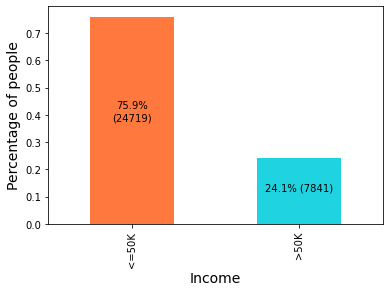

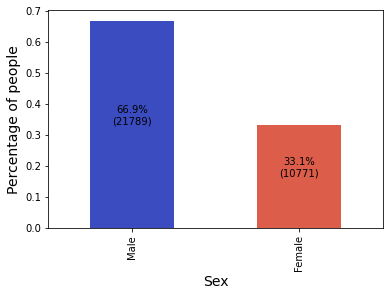

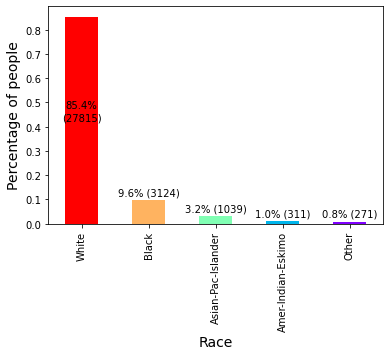

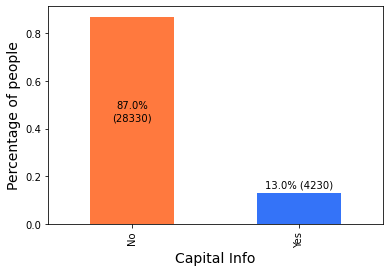

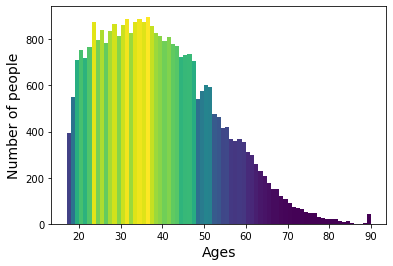

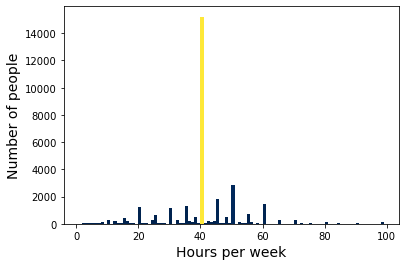

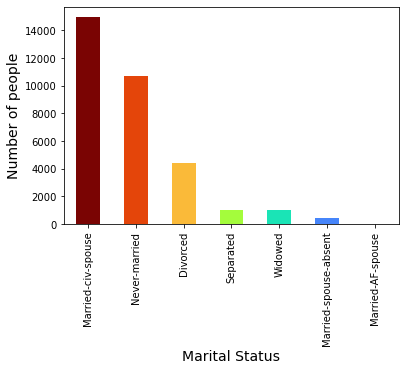

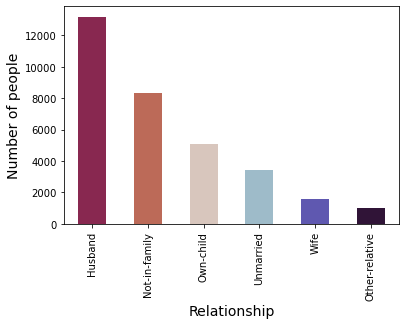

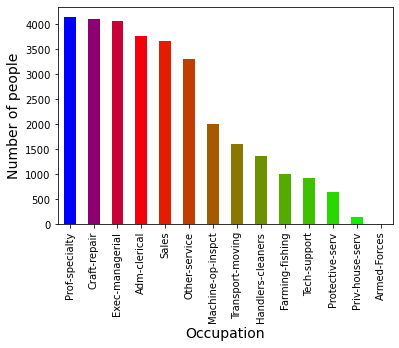

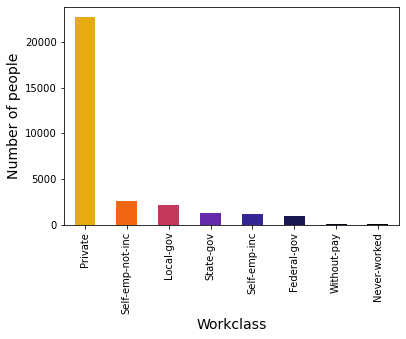

In [11]:
hist(x=a['Income'].value_counts(), df=True, pct=True,
     xlabel='Income', ylabel='Percentage of people',
     cmap='rainbow', func=lambda x: np.sin(x), annotate=True)
hist(x=a['Sex'].value_counts(), df=True, pct=True,
     xlabel='Sex', ylabel='Percentage of people',
     cmap='coolwarm', func=lambda x: 1-x**3, annotate=True)
hist(x=a['Race'].value_counts(), title='', cmap='rainbow', pct=True,
     xlabel='Race', ylabel='Percentage of people',df=True, annotate=True,
     func=lambda x: np.linspace(1,0,len(x)))
hist(x=a['Capital Info'].value_counts(), df=True, pct=True,
     xlabel='Capital Info', ylabel='Percentage of people',
     cmap='rainbow', func=lambda x: np.sin(x), annotate=True)
hist(x=a['Age'], xlabel='Ages', ylabel='Number of people')
hist(x=a['Hours per week'], cmap='cividis',
     xlabel='Hours per week', ylabel='Number of people')
hist(x=a['Marital Status'].value_counts(), title='', cmap='turbo',
     xlabel='Marital Status', ylabel='Number of people', df=True,
     func=lambda x: np.linspace(1,0,len(x)))
hist(x=a['Relationship'].value_counts(), title='', cmap='twilight_shifted',
     xlabel='Relationship', ylabel='Number of people', df=True,
     func=lambda x: np.sin(np.linspace(1,0,len(x))))
hist(x=a['Occupation'].value_counts(),
     xlabel='Occupation', ylabel='Number of people', cmap='brg', df=True,
     func=lambda x: np.sqrt(np.linspace(0, 1, num=len(x))))
hist(x=a['Workclass'].value_counts(), title='', cmap='CMRmap',
     xlabel='Workclass', ylabel='Number of people', df=True,
     func=lambda x: np.sin(np.linspace(1,0,len(x)))**2)

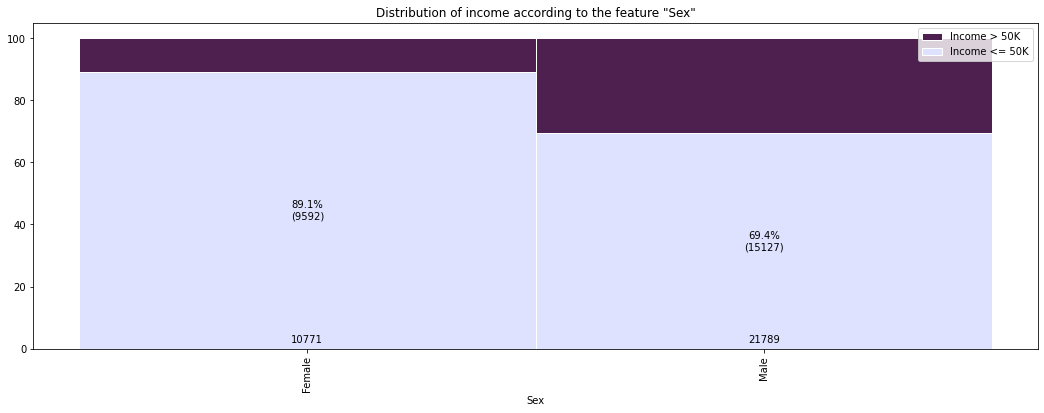

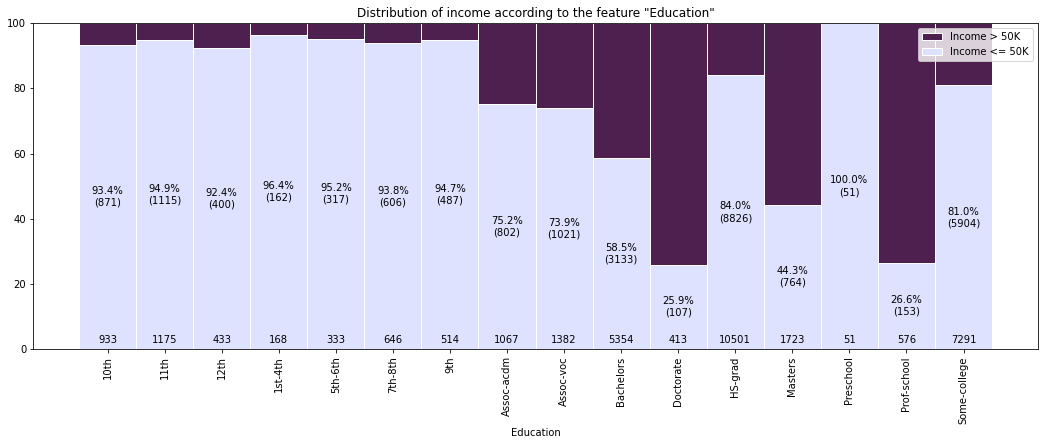

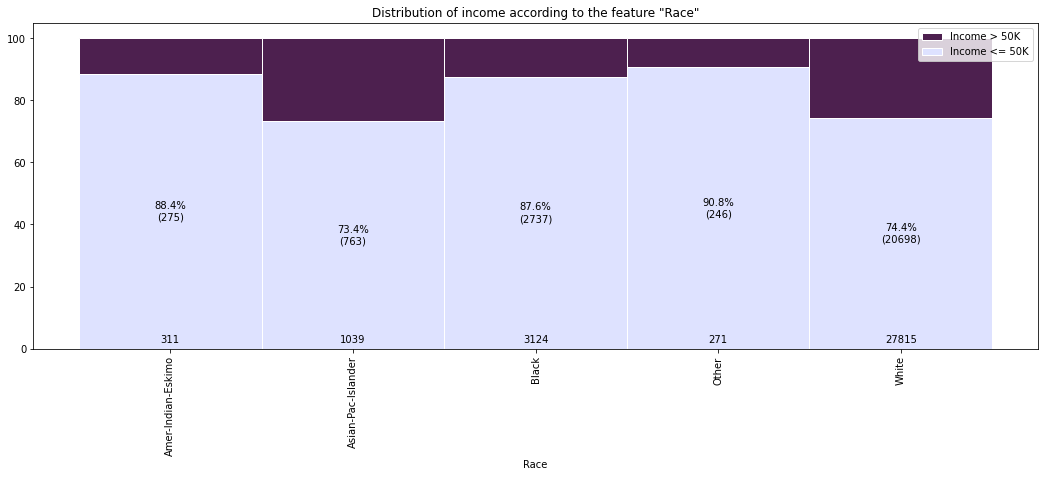

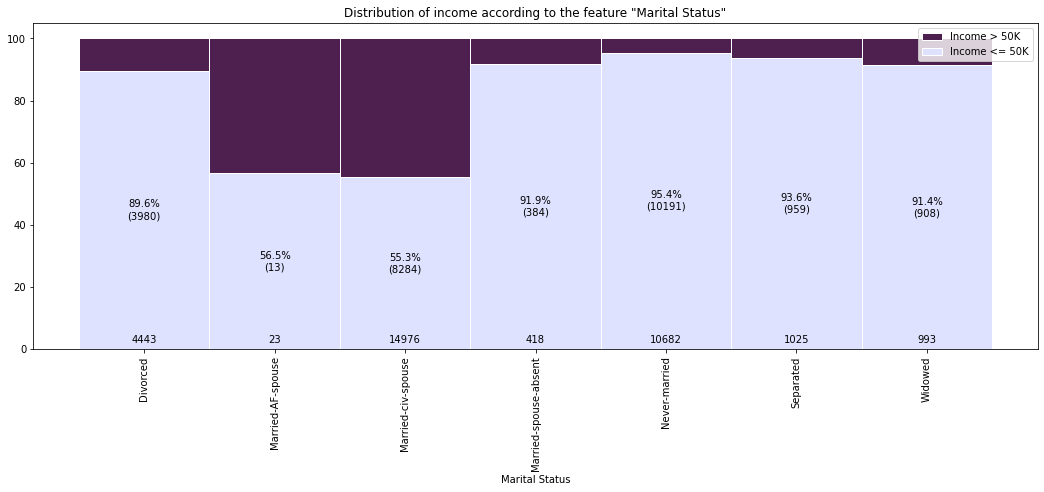

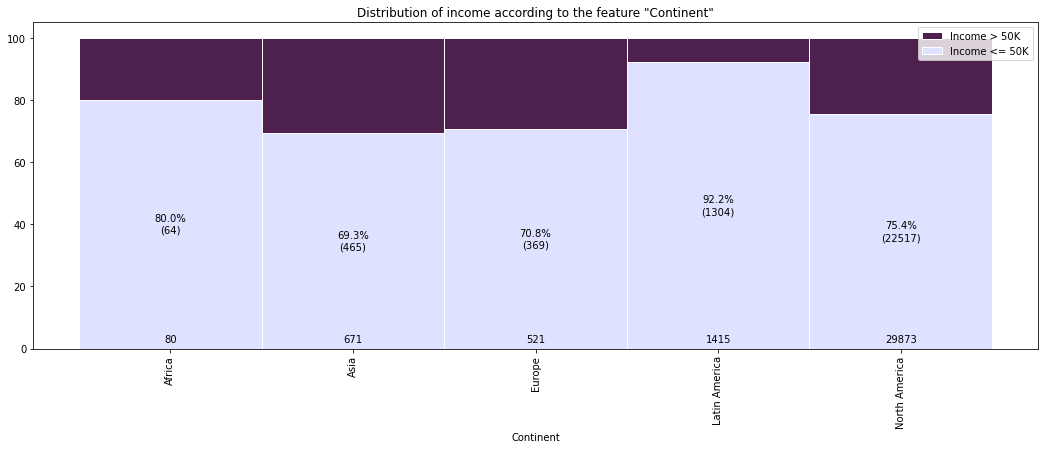

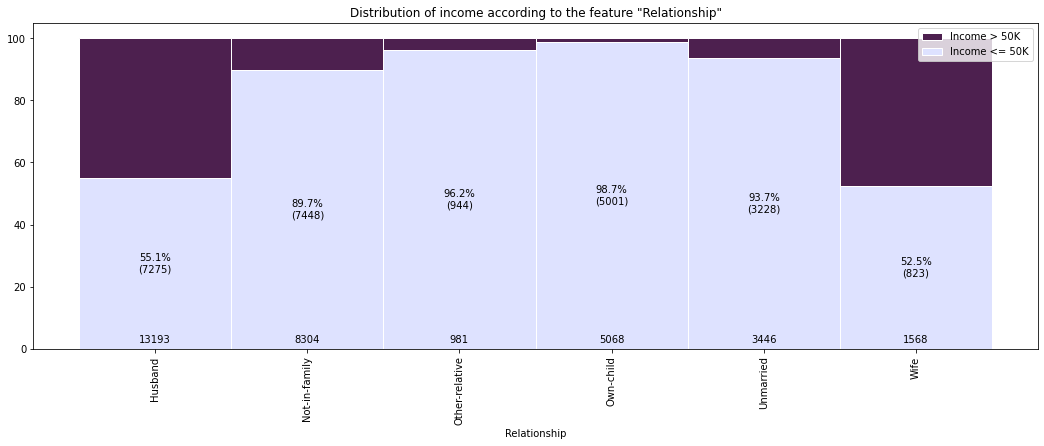

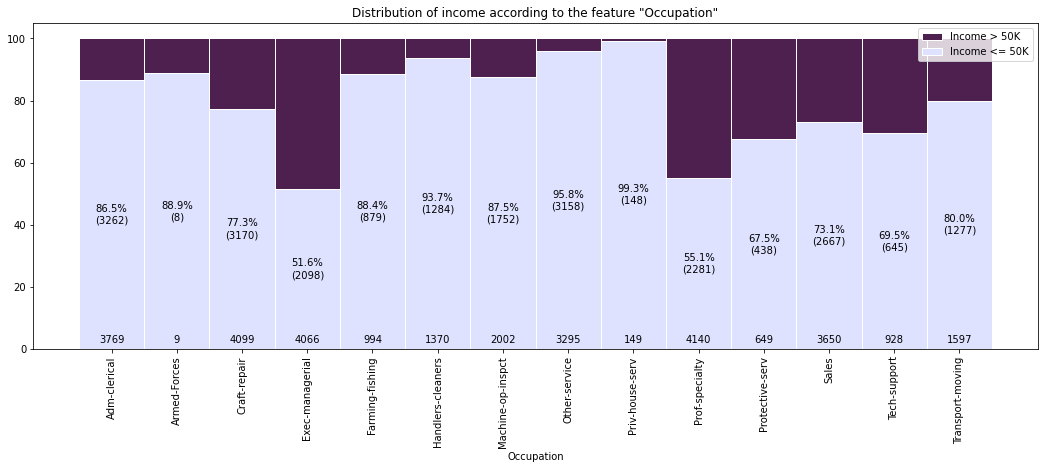

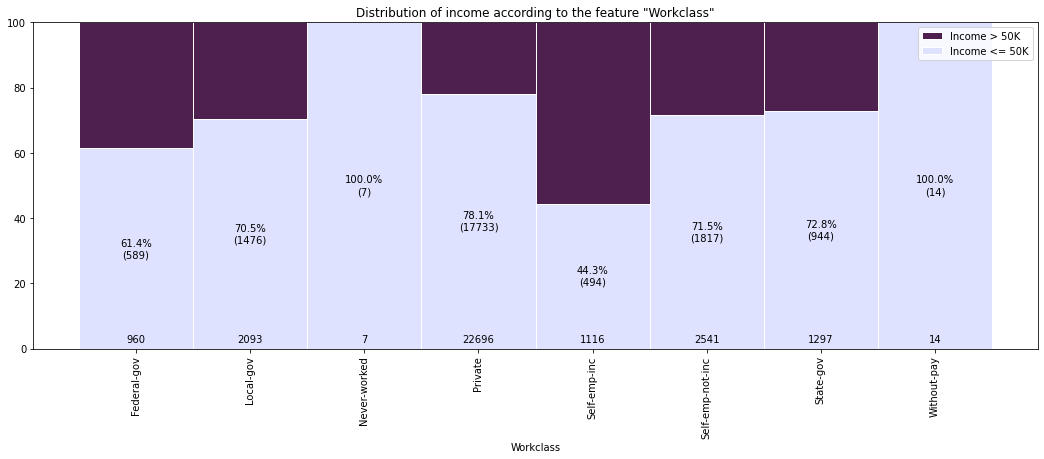

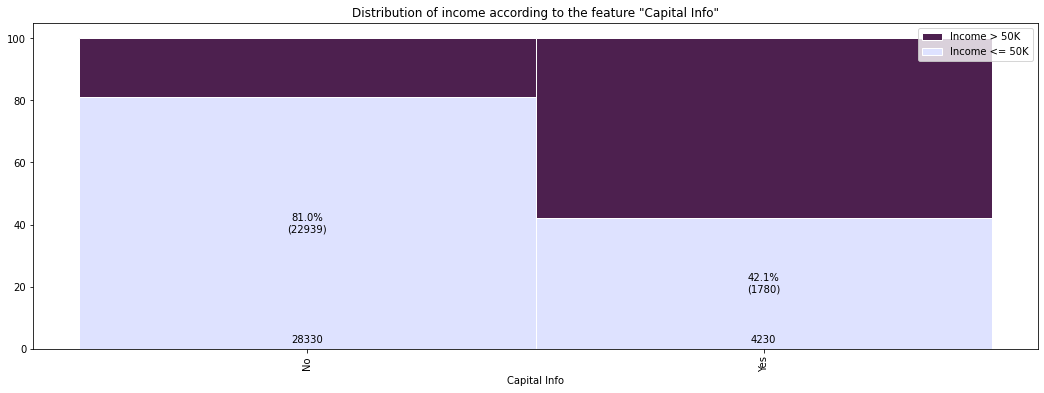

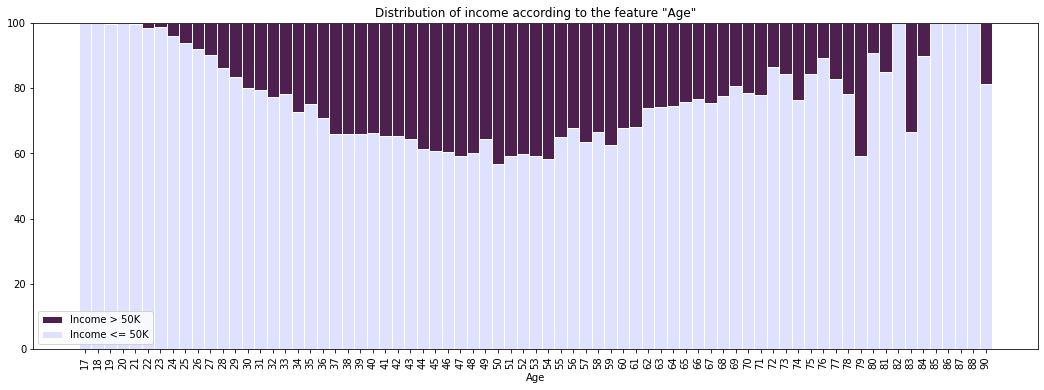

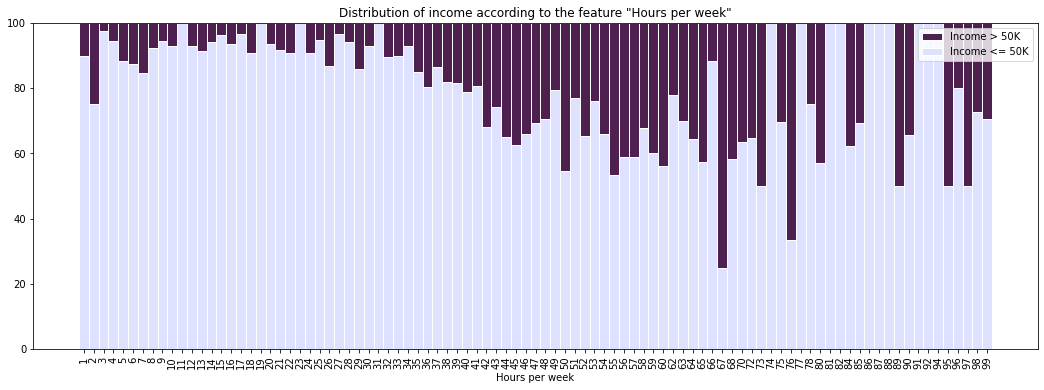

In [12]:
num_feat = ['Age', 'Hours per week']
categ_feat = ['Sex', 'Education', 'Race', 'Marital Status', 'Continent',
              'Relationship', 'Occupation', 'Workclass', 'Capital Info']
bot_color = '#dee2ff'
top_color = '#4d204f'
for feat in categ_feat + num_feat:
    fig, ax = plt.subplots(figsize=(18,6))
    total = a.groupby(feat, as_index=False).agg({'Income':'count'})
    total.columns = [feat, 'Total']
    low = a.loc[a['Income'] == '<=50K'].groupby(feat, as_index=False).agg({'Income':'count'})
    low.columns = [feat, '<=50K']
    low = low.merge(total, on=feat, how='left')
    arr_low = np.array(low['<=50K'])
    arr_tot = np.array(low['Total'])
    low['%<=50K'] = low['<=50K'] / low['Total'] * 100
    arr = np.array([low['%<=50K'], 100 - low['%<=50K']])
    r = np.arange(len(arr[0]))
    bar1 = ax.bar(r, arr[1], bottom=arr[0], color=top_color, edgecolor='white', width=1, label='Income > 50K')
    bar2 = ax.bar(r, arr[0], color=bot_color, edgecolor='white', width=1, label='Income <= 50K')
    ax.set_xticks(r, low[feat], rotation='vertical')
    ax.set_xlabel(feat)
    ax.set_title(f'Distribution of income according to the feature "{feat}"')
    ax.legend()
    if feat in categ_feat:
        for i in r:
            ax.annotate(f'{round(arr[0][i],1)}%\n({arr_low[i]})', xy=(r[i], arr[0][i]*0.5),
                        ha='center', va='center')
            ax.annotate(f'{arr_tot[i]}', xy=(r[i], 3),
                        ha='center', va='center')
    plt.show()

## 1.2. Data prep

In [13]:
# see which columns have missing data
a.isna().any()

ID                  False
Age                 False
Workclass            True
fnlwgt              False
Education           False
Education Number    False
Marital Status      False
Occupation           True
Relationship        False
Race                False
Sex                 False
Capital Gain        False
Capital Loss        False
Hours per week      False
Country             False
Income              False
Continent           False
Capital Info        False
dtype: bool

In [14]:
# filling data for Workclass and Occupation, which have missing data.
# we fill the data randomly, but with weights according to existing data.
wk_p = a['Workclass'].value_counts(normalize=True)
a.loc[a['Workclass'].isna(),'Workclass'] = np.random.choice(wk_p.index,
                                           size=a['Workclass'].isna().sum(), p=wk_p.values)
wk_p = t['Workclass'].value_counts(normalize=True)
t.loc[t['Workclass'].isna(),'Workclass'] = np.random.choice(wk_p.index,
                                           size=t['Workclass'].isna().sum(), p=wk_p.values)
oc_p = a['Occupation'].value_counts(normalize=True)
a.loc[a['Occupation'].isna(),'Occupation'] = np.random.choice(oc_p.index,
                                             size=a['Occupation'].isna().sum(), p=oc_p.values)
oc_p = t['Occupation'].value_counts(normalize=True)
t.loc[t['Occupation'].isna(),'Occupation'] = np.random.choice(oc_p.index,
                                             size=t['Occupation'].isna().sum(), p=oc_p.values)

### From the file 'Extra-file-from-UCL.txt':
#### Description of fnlwgt (final weight)

The term estimate refers to population totals derived from CPS by creating
"weighted tallies" of any specified socio-economic characteristics of the
population.

People with similar demographic characteristics should have
similar weights.  There is one important caveat to remember
about this statement.  That is that since the CPS sample is
actually a collection of 51 state samples, each with its own
probability of selection, the statement only applies within
state.

#### Conclusion:

As said above, this feature only applies with knowledge of each person's state. Since we do not have data to infer the states of the individuals, we can not use 'fnlwgt' to predict anything. Therefore, we are going to drop it.

In [15]:
X = a.drop(columns=['ID','fnlwgt', 'Education', 'Country', 'Capital Loss', 'Capital Gain', 'Income'])
Y = a['Income'].copy()
Xtest = t.drop(columns=['fnlwgt', 'Education', 'Country', 'Capital Loss', 'Capital Gain'])

In [16]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

#### Transforming categorical features into numerical features and scaling data with RobustScaler()

In [17]:
X = X.apply(LabelEncoder().fit_transform)
columns = X.columns
X[columns] = RobustScaler().fit_transform(X[columns].values)
Xtest = Xtest.apply(LabelEncoder().fit_transform)
Xtest[columns] = RobustScaler().fit_transform(Xtest[columns].values)

# 2. Comparando classificadores diferentes:

0. kNN (do primeiro EP)
1. Logistic Regression
2. SVM
3. GradientBoostingClassifier
4. Multi-Layer Perceptron (MLP)

Utilizaremos um holdout para separar 20% dos dados para testar os classificadores acima. E então escolheremos o melhor para ele ser avaliado pelo Kaggle.

In [1]:
test_sz = 0.2
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## 2.0. kNN (do primeiro EP)

### 2.0.1. kNN: Validation

#### Using cross-validation to tune the hyperparameter k for kNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier as knn
sc = []
min_k, max_k = 25, 50
for k in range(min_k, max_k):
    scores = cross_val_score(knn(n_neighbors=k), X, Y, cv=5)
    sc.append(scores.mean())
sc = np.array(sc)
best_k = sc.argmax() + min_k
print(f'best fit k = {best_k}')

best fit k = 39


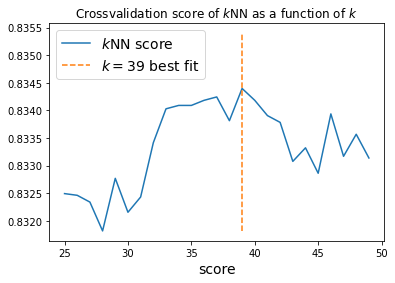

In [19]:
plt.plot(range(min_k, max_k), sc, label=r'$k$NN score')
plt.plot(np.full(100, best_k), np.linspace(sc.min(), sc.max() + 0.001, 100), '--',
         label=r'$k = %d$ best fit'%(best_k))
plt.xlabel(r'$k$', fontsize=14)
plt.xlabel(r'score', fontsize=14)
plt.legend(fontsize=14)
plt.title(r'Crossvalidation score of $k$NN as a function of $k$')
plt.show()

### 2.0.2. kNN: Testing

In [3]:
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=test_sz, random_state=13)

NameError: name 'X' is not defined

In [21]:
model = knn(n_neighbors=best_k)
model.fit(Xtrain, Ytrain)
Ypred = model.predict(Xval)

In [23]:
print(classification_report(Yval, Ypred))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      7443
        >50K       0.68      0.54      0.60      2325

    accuracy                           0.83      9768
   macro avg       0.77      0.73      0.75      9768
weighted avg       0.82      0.83      0.82      9768



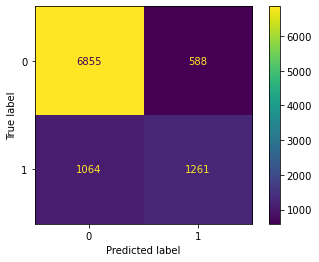

In [24]:
cf_matrix = confusion_matrix(Yval, Ypred)
disp = ConfusionMatrixDisplay(cf_matrix)
disp.plot()
plt.show()

## 3.0. Logistic Regression

### 3.0.1. Logistic Regression: Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
sc = []
min_k, max_k = 25, 50
for k in range(min_k, max_k):
    scores = cross_val_score(knn(n_neighbors=k), X, Y, cv=5)
    sc.append(scores.mean())
sc = np.array(sc)
best_k = sc.argmax() + min_k
print(f'best fit k = {best_k}')

In [ ]:
plt.plot(range(min_k, max_k), sc, label=r'$k$NN score')
plt.plot(np.full(100, best_k), np.linspace(sc.min(), sc.max() + 0.001, 100), '--',
         label=r'$k = %d$ best fit'%(best_k))
plt.xlabel(r'$k$', fontsize=14)
plt.xlabel(r'score', fontsize=14)
plt.legend(fontsize=14)
plt.title(r'Crossvalidation score of $k$NN as a function of $k$')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=test_sz, random_state=13)

In [ ]:
model = knn(n_neighbors=best_k)
model.fit(Xtrain, Ytrain)
Ypred = model.predict(Xval)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print(classification_report(Yval, Ypred))

In [ ]:
cf_matrix = confusion_matrix(Yval, Ypred)
disp = ConfusionMatrixDisplay(cf_matrix)
disp.plot()
plt.show()

## 3. Training and Submitting

#### We train kNN one last time with all available training data. And then we apply the classifier to the testing dataset and submit the result.

In [25]:
model = knn(n_neighbors=best_k)
model.fit(X, Y)
Xtest['Income'] = model.predict(Xtest.drop(columns='ID'))
Xtest.head()

,ID,Age,Workclass,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Continent,Capital Info,Income
0,0,-0.60,0.0,1.000000,1.0,0.428571,0.000000,0.0,0.0,0.8,0.0,0.0,<=50K
1,1,1.35,3.0,1.000000,0.0,-0.428571,-0.333333,0.0,0.0,1.0,0.0,0.0,>50K
2,2,-0.30,0.0,1.333333,-1.0,-0.428571,0.000000,0.0,-1.0,0.0,0.0,0.0,<=50K
3,3,0.40,0.0,-0.333333,1.0,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,<=50K
4,4,1.35,1.0,1.000000,0.0,-0.428571,-0.333333,0.0,0.0,2.0,0.0,0.0,>50K


In [26]:
Xtest[['ID', 'Income']].to_csv('submission.csv', index=False)